In [1]:
import numpy as np
import numpy.random as npr
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import time

In [3]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import regularizers
from tensorflow.keras import layers

In [4]:
# Loading Data
data = np.load('preprocessed64.npy')
labels = np.load('newlabel.npy')
labels = to_categorical(labels)

In [5]:
data.shape

(6697, 64, 64)

In [6]:
labels.shape

(6697, 10)

In [7]:
class_names = ['A', 'B', 'C', 'D', 'E',
               'F', 'G', 'H', '$', '#']

In [8]:
# Split data
train_images , test_images , train_labels, test_labels = train_test_split(data, labels, test_size = 0.1, stratify = labels)


In [9]:
# data augmentation
data_augmentation = tf.keras.Sequential(
  [
    layers.RandomZoom(0.01),
  ]
)

In [10]:
# Build the model
model_A = tf.keras.Sequential([
    data_augmentation,
    Flatten(input_shape=(64,64)),
    Dense(512, activation='elu'),
    Dropout(0.08),
    Dense(64, activation='elu',kernel_regularizer=regularizers.l2(0.001)),
    Dense(10)
])

model_A.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               loss = BinaryCrossentropy(),
              metrics=['accuracy'])

In [11]:
# fit 
epochs = 400
history = model_A.fit(train_images, train_labels, validation_data=(test_images,test_labels), epochs=epochs)



Epoch 1/400
189/189 [==============================] - 3s 12ms/step - loss: 0.4541 - accuracy: 0.1336 - val_loss: 0.3845 - val_accuracy: 0.1567
Epoch 2/400
189/189 [==============================] - 2s 11ms/step - loss: 0.3636 - accuracy: 0.2097 - val_loss: 0.3416 - val_accuracy: 0.2507
Epoch 3/400
189/189 [==============================] - 2s 11ms/step - loss: 0.3352 - accuracy: 0.2550 - val_loss: 0.3397 - val_accuracy: 0.2015
Epoch 4/400
189/189 [==============================] - 2s 11ms/step - loss: 0.3165 - accuracy: 0.2781 - val_loss: 0.3147 - val_accuracy: 0.2881
Epoch 5/400
189/189 [==============================] - 2s 11ms/step - loss: 0.2997 - accuracy: 0.3298 - val_loss: 0.3033 - val_accuracy: 0.2896
Epoch 6/400
189/189 [==============================] - 2s 11ms/step - loss: 0.2894 - accuracy: 0.3479 - val_loss: 0.2949 - val_accuracy: 0.3284
Epoch 7/400
189/189 [==============================] - 2s 11ms/step - loss: 0.2802 - accuracy: 0.3823 - val_loss: 0.2991 - val_accuracy:

189/189 [==============================] - 2s 12ms/step - loss: 0.1616 - accuracy: 0.6919 - val_loss: 0.2233 - val_accuracy: 0.5836
Epoch 58/400
189/189 [==============================] - 2s 11ms/step - loss: 0.1632 - accuracy: 0.6872 - val_loss: 0.2251 - val_accuracy: 0.5940
Epoch 59/400
189/189 [==============================] - 2s 11ms/step - loss: 0.1600 - accuracy: 0.6848 - val_loss: 0.2153 - val_accuracy: 0.6209
Epoch 60/400
189/189 [==============================] - 2s 11ms/step - loss: 0.1598 - accuracy: 0.6869 - val_loss: 0.2297 - val_accuracy: 0.5836
Epoch 61/400
189/189 [==============================] - 2s 11ms/step - loss: 0.1567 - accuracy: 0.7003 - val_loss: 0.2242 - val_accuracy: 0.5881
Epoch 62/400
189/189 [==============================] - 2s 11ms/step - loss: 0.1575 - accuracy: 0.6977 - val_loss: 0.2120 - val_accuracy: 0.6075
Epoch 63/400
189/189 [==============================] - 2s 12ms/step - loss: 0.1555 - accuracy: 0.6985 - val_loss: 0.2231 - val_accuracy: 0.586

189/189 [==============================] - 2s 10ms/step - loss: 0.1182 - accuracy: 0.7904 - val_loss: 0.2189 - val_accuracy: 0.6418
Epoch 114/400
189/189 [==============================] - 2s 11ms/step - loss: 0.1231 - accuracy: 0.7812 - val_loss: 0.2242 - val_accuracy: 0.6254
Epoch 115/400
189/189 [==============================] - 2s 11ms/step - loss: 0.1184 - accuracy: 0.7948 - val_loss: 0.2252 - val_accuracy: 0.6313
Epoch 116/400
189/189 [==============================] - 2s 11ms/step - loss: 0.1217 - accuracy: 0.7795 - val_loss: 0.2251 - val_accuracy: 0.6463
Epoch 117/400
189/189 [==============================] - 2s 11ms/step - loss: 0.1175 - accuracy: 0.7918 - val_loss: 0.2343 - val_accuracy: 0.6149
Epoch 118/400
189/189 [==============================] - 2s 11ms/step - loss: 0.1145 - accuracy: 0.7956 - val_loss: 0.2249 - val_accuracy: 0.6060
Epoch 119/400
189/189 [==============================] - 2s 11ms/step - loss: 0.1200 - accuracy: 0.7871 - val_loss: 0.2428 - val_accuracy:

189/189 [==============================] - 2s 11ms/step - loss: 0.1011 - accuracy: 0.8279 - val_loss: 0.2430 - val_accuracy: 0.6448
Epoch 170/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0964 - accuracy: 0.8410 - val_loss: 0.2182 - val_accuracy: 0.6791
Epoch 171/400
189/189 [==============================] - 2s 11ms/step - loss: 0.1001 - accuracy: 0.8336 - val_loss: 0.2432 - val_accuracy: 0.6254
Epoch 172/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0954 - accuracy: 0.8424 - val_loss: 0.2540 - val_accuracy: 0.6388
Epoch 173/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0934 - accuracy: 0.8469 - val_loss: 0.2806 - val_accuracy: 0.5866
Epoch 174/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0976 - accuracy: 0.8391 - val_loss: 0.2296 - val_accuracy: 0.6612
Epoch 175/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0959 - accuracy: 0.8401 - val_loss: 0.2190 - val_accuracy:

189/189 [==============================] - 2s 11ms/step - loss: 0.0858 - accuracy: 0.8638 - val_loss: 0.2451 - val_accuracy: 0.6716
Epoch 226/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0852 - accuracy: 0.8591 - val_loss: 0.2657 - val_accuracy: 0.6373
Epoch 227/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0815 - accuracy: 0.8751 - val_loss: 0.2332 - val_accuracy: 0.6731
Epoch 228/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0849 - accuracy: 0.8674 - val_loss: 0.2558 - val_accuracy: 0.6657
Epoch 229/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0796 - accuracy: 0.8819 - val_loss: 0.2464 - val_accuracy: 0.6672
Epoch 230/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0851 - accuracy: 0.8631 - val_loss: 0.2598 - val_accuracy: 0.6448
Epoch 231/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0856 - accuracy: 0.8631 - val_loss: 0.2419 - val_accuracy:

189/189 [==============================] - 2s 11ms/step - loss: 0.0764 - accuracy: 0.8855 - val_loss: 0.2731 - val_accuracy: 0.6672
Epoch 282/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0793 - accuracy: 0.8815 - val_loss: 0.2705 - val_accuracy: 0.6687
Epoch 283/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0758 - accuracy: 0.8832 - val_loss: 0.2797 - val_accuracy: 0.6403
Epoch 284/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0720 - accuracy: 0.8946 - val_loss: 0.2624 - val_accuracy: 0.6896
Epoch 285/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0780 - accuracy: 0.8822 - val_loss: 0.2802 - val_accuracy: 0.6642
Epoch 286/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0745 - accuracy: 0.8882 - val_loss: 0.3058 - val_accuracy: 0.6343
Epoch 287/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0736 - accuracy: 0.8920 - val_loss: 0.2815 - val_accuracy:

189/189 [==============================] - 2s 11ms/step - loss: 0.0679 - accuracy: 0.9021 - val_loss: 0.2717 - val_accuracy: 0.6612
Epoch 338/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0726 - accuracy: 0.8900 - val_loss: 0.2600 - val_accuracy: 0.6940
Epoch 339/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0701 - accuracy: 0.8985 - val_loss: 0.2751 - val_accuracy: 0.6731
Epoch 340/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0682 - accuracy: 0.9056 - val_loss: 0.2851 - val_accuracy: 0.6701
Epoch 341/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0646 - accuracy: 0.9079 - val_loss: 0.2765 - val_accuracy: 0.6806
Epoch 342/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0720 - accuracy: 0.8930 - val_loss: 0.2910 - val_accuracy: 0.6672
Epoch 343/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0664 - accuracy: 0.9074 - val_loss: 0.3186 - val_accuracy:

189/189 [==============================] - 2s 11ms/step - loss: 0.0630 - accuracy: 0.9169 - val_loss: 0.2973 - val_accuracy: 0.6537
Epoch 394/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0629 - accuracy: 0.9121 - val_loss: 0.3088 - val_accuracy: 0.6448
Epoch 395/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0587 - accuracy: 0.9222 - val_loss: 0.3154 - val_accuracy: 0.6672
Epoch 396/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0623 - accuracy: 0.9147 - val_loss: 0.2862 - val_accuracy: 0.6657
Epoch 397/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0608 - accuracy: 0.9169 - val_loss: 0.2914 - val_accuracy: 0.6627
Epoch 398/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0643 - accuracy: 0.9092 - val_loss: 0.2924 - val_accuracy: 0.6672
Epoch 399/400
189/189 [==============================] - 2s 11ms/step - loss: 0.0607 - accuracy: 0.9162 - val_loss: 0.3017 - val_accuracy:

In [12]:
# evaluation

loss, acc = model_A.evaluate(test_images,test_labels)
print("model, accuracy: {:5.2f}%".format(100 * acc))

21/21 [==============================] - 0s 3ms/step - loss: 0.3014 - accuracy: 0.6597
model, accuracy: 65.97%


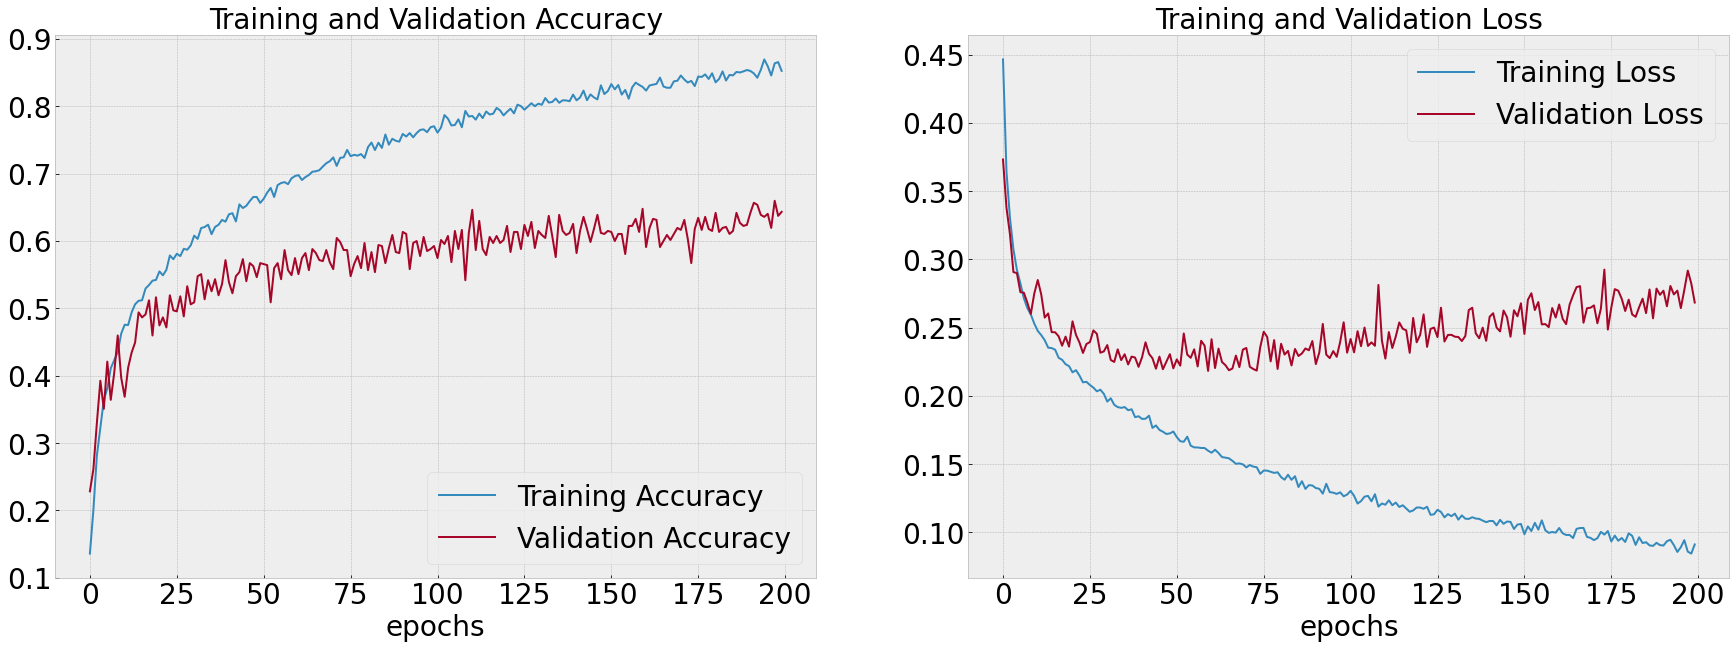

In [17]:
epochs_range = range(epochs)
fronttsize = 28

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right', fontsize=fronttsize)
plt.title('Training and Validation Accuracy', fontsize=fronttsize)
plt.xlabel('epochs', fontsize=fronttsize)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right', fontsize=fronttsize)
plt.title('Training and Validation Loss', fontsize=fronttsize)
plt.xlabel('epochs', fontsize=fronttsize)

plt.savefig('model_evaluation.png')
plt.show()

In [13]:


predictions = model_A.predict(test_images)


score  = tf.nn.softmax(predictions[3])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to H with a 35.94 percent confidence.


In [14]:
y_pred = tf.math.argmax(predictions, axis=1)

In [15]:
y_true = tf.math.argmax(test_labels, axis=1)

In [16]:
matrix = confusion_matrix(y_true, y_pred)
matrix

array([[39,  2,  1,  6,  2,  0,  2,  6,  4,  6],
       [ 0, 31,  1,  3,  2,  7,  2, 18,  2,  2],
       [ 0,  1, 50,  3,  4,  0,  1,  5,  1,  3],
       [ 2,  3,  1, 51,  0,  0,  1,  4,  2,  2],
       [ 1,  1,  6,  4, 36,  7,  1,  3,  2,  4],
       [ 0,  1,  1,  2,  4, 46,  2,  1,  5,  4],
       [ 6,  2,  0,  3,  0,  1, 40,  7,  6,  2],
       [ 0,  3,  2,  1,  2,  0,  2, 51,  4,  3],
       [ 0,  0,  1,  0,  0,  5,  3,  8, 43,  7],
       [ 1,  0,  1,  1,  0,  1,  0,  6,  2, 55]], dtype=int64)

In [17]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           A       0.80      0.57      0.67        68
           B       0.70      0.46      0.55        68
           C       0.78      0.74      0.76        68
           D       0.69      0.77      0.73        66
           E       0.72      0.55      0.63        65
           F       0.69      0.70      0.69        66
           G       0.74      0.60      0.66        67
           H       0.47      0.75      0.58        68
           $       0.61      0.64      0.62        67
           #       0.62      0.82      0.71        67

    accuracy                           0.66       670
   macro avg       0.68      0.66      0.66       670
weighted avg       0.68      0.66      0.66       670



In [18]:
np.mean(matrix.diagonal()/matrix.sum(axis=1))

0.6597950498433378

In [ ]:
# # fit
# model_A.fit(train_images, train_labels, epochs=400)

# # evaluation
# loss, acc = model_A.evaluate(test_images, test_labels)
# print("model, accuracy: {:5.2f}%".format(100 * acc))

In [19]:
# save the model 
model_A.save_weights('./my_checkpoint')
model_A.save('./my_model')

INFO:tensorflow:Assets written to: ./my_model\assets
